In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.27393767, -0.19092897, -0.12125909, -0.20490529,  0.08038728,
        -0.12235069,  0.11853189, -0.03743111,  0.1756897 , -0.15931274]],
      dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.0809815 , 0.08799055, 0.09433943, 0.08676932, 0.11541631,
        0.09423652, 0.11990386, 0.10258865, 0.12695695, 0.09081693]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.3619475

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 742us/step - loss: 0.2967 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.1442 - accuracy: 0.9561
Epoch 3/5
1875/1875 [==============================] - 1s 732us/step - loss: 0.1069 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 1s 738us/step - loss: 0.0883 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 1s 741us/step - loss: 0.0757 - accuracy: 0.9762


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0777 - accuracy: 0.9761 - 216ms/epoch - 691us/step


[0.07770772278308868, 0.9761000275611877]

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [12]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.8449862e-06, 2.5292238e-08, 7.0498786e-06, 2.5605867e-03,
        5.5761007e-11, 5.1660763e-06, 5.1506802e-11, 9.9739885e-01,
        3.9612964e-06, 2.0467900e-05],
       [2.1875765e-06, 2.4808710e-03, 9.9749541e-01, 5.2774039e-06,
        1.6064468e-14, 1.1220217e-05, 6.7394240e-08, 5.3046356e-12,
        5.0479280e-06, 1.8847613e-11],
       [2.0617201e-06, 9.9851674e-01, 2.0778668e-04, 6.2252650e-05,
        3.9057264e-05, 6.1764367e-05, 4.6958063e-05, 5.7244970e-04,
        4.8902247e-04, 1.9265403e-06],
       [9.9998009e-01, 3.8986238e-11, 7.0147576e-06, 7.1932499e-07,
        6.3746796e-08, 1.0062018e-06, 3.2655175e-06, 4.7706369e-08,
        9.7380921e-09, 7.7742907e-06],
       [2.3633289e-05, 1.5835497e-09, 2.3403218e-05, 2.0016932e-07,
        9.9514681e-01, 1.2175414e-07, 4.6235714e-06, 1.1514965e-04,
        6.7627648e-06, 4.6793874e-03]], dtype=float32)>

In [28]:
# predictions = model.predict(x_train)
# n = 0
# plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
# plt.title(np.argmax(predictions[n], axis=0))
# plt.show()

pred = model(x_train[0:1], training=False)
print(pred)
print(np.argmax(pred[0]))

tf.Tensor(
[[ -9.379078   -6.1119676  -1.1943331  10.400188  -31.762033   13.286164
  -14.611672   -9.278688  -13.0529995  -4.963885 ]], shape=(1, 10), dtype=float32)
5


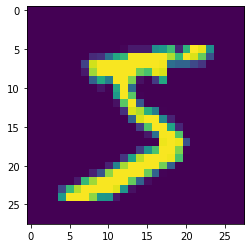

Guessed number: 5


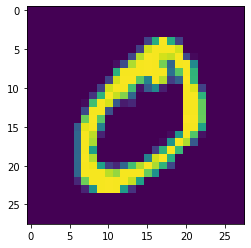

Guessed number: 0


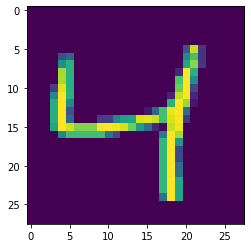

Guessed number: 4


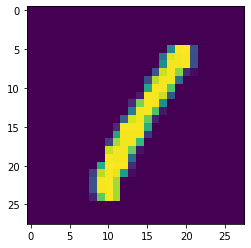

Guessed number: 1


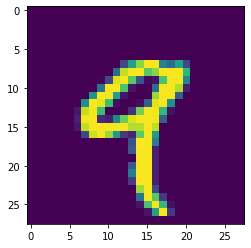

Guessed number: 9


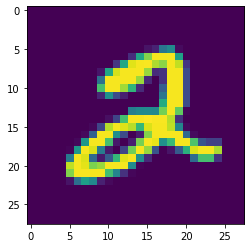

Guessed number: 2


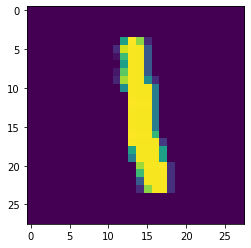

Guessed number: 1


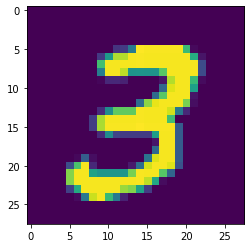

Guessed number: 3


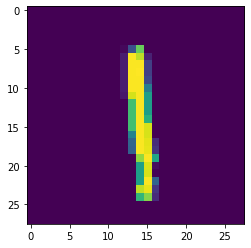

Guessed number: 1


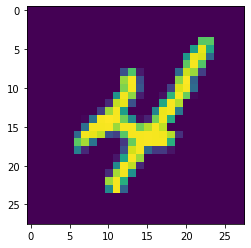

Guessed number: 4


In [32]:

for x_train_i in range(10):
    plt.imshow(x_train[x_train_i])
    plt.show()
    pred = model(x_train[[x_train_i]], training=False)
    print('Guessed number: {}'.format(np.argmax(pred[0])))

In [ ]:
import pathlib
print(os.getcwd()+'\images\mnist_dataset')
data_dir = pathlib.Path(os.getcwd()+'\images\mnist_dataset')
print(data_dir)

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)
)